# Thyroid Dataset
Dataset: http://archive.ics.uci.edu/ml/datasets/thyroid+disease

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note that the description of the dataset is only pertaining to the <strong>training</strong> dataset. There will be another dataset specifically for <strong> test </strong>

In [20]:
df = pd.read_csv('./raw/train.csv')

In [21]:
df.shape  # Dimension of the dataframe (i.e. 3772 samples and 22 columns (including the target))

(3772, 22)

In [22]:
df.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypoituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [23]:
df.tail()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypoituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
3767,0.77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00006,0.0206,0.125,0.107,0.117,3
3768,0.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00130,0.0250,0.125,0.114,0.109,3
3769,0.88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.01300,0.0174,0.123,0.099,0.124,2
3770,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00078,0.0206,0.106,0.088,0.121,3
3771,0.46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.093,0.091,0.102,3


In [24]:
df.dtypes # data type for each column

Age                          float64
Sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypoituitary                   int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
TBG                            int64
dtype: object

Continuous variables in the dataset seems to be already normalised to range between 0 and 1, and there are no missing data. Suitable for performing neural network

In [25]:
df_stat = df.describe().T
df_stat['missing'] = df.isnull().sum()
df_stat

,count,mean,std,min,25%,50%,75%,max,missing
Age,3772.0,0.515102,0.189525,0.0100,0.3600,0.5400,0.6700,0.9400,0
Sex,3772.0,0.303022,0.459626,0.0000,0.0000,0.0000,1.0000,1.0000,0
on_thyroxine,3772.0,0.123277,0.328798,0.0000,0.0000,0.0000,0.0000,1.0000,0
query_on_thyroxine,3772.0,0.012990,0.113248,0.0000,0.0000,0.0000,0.0000,1.0000,0
on_antithyroid_medication,3772.0,0.011400,0.106174,0.0000,0.0000,0.0000,0.0000,1.0000,0
sick,3772.0,0.038441,0.192284,0.0000,0.0000,0.0000,0.0000,1.0000,0
pregnant,3772.0,0.014051,0.117716,0.0000,0.0000,0.0000,0.0000,1.0000,0
thyroid_surgery,3772.0,0.014316,0.118806,0.0000,0.0000,0.0000,0.0000,1.0000,0
I131_treatment,3772.0,0.015111,0.122012,0.0000,0.0000,0.0000,0.0000,1.0000,0
query_hypothyroid,3772.0,0.062036,0.241253,0.0000,0.0000,0.0000,0.0000,1.0000,0


One challenge about this dataset is that it is highly imbalanced with most of the samples being normal (3) and very small sample of non-normal samples (1 and 2)

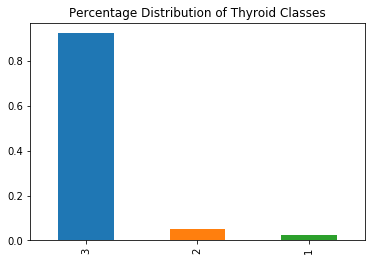

In [26]:
df_class = df.TBG.value_counts()
df_class = df_class/len(df)
df_class.plot(kind='bar', title='Percentage Distribution of Thyroid Classes')

Plotting the changes in the distribution of each categorical parameters across each class of thyroid conditions. Some parameters do not exhibit any changes in the distribution

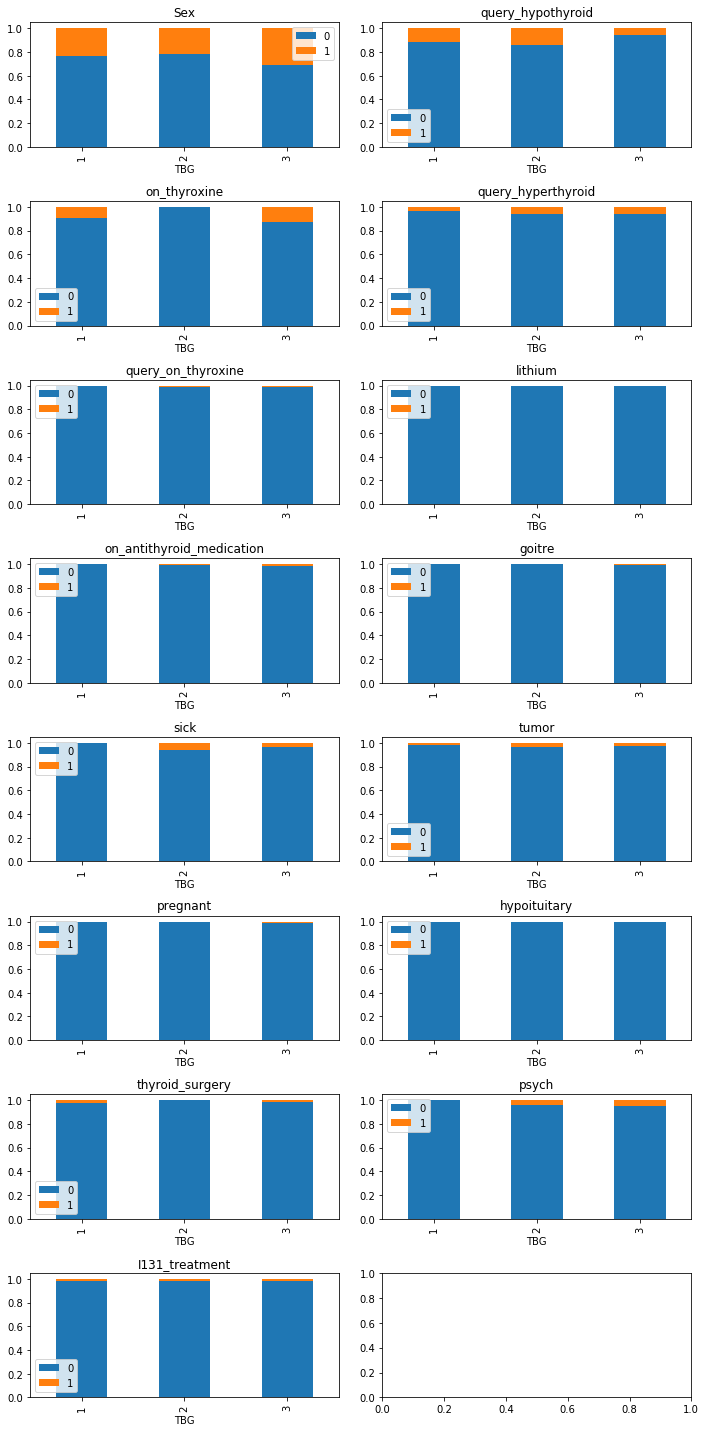

In [27]:
cat_col = [i for i in range(0,len(df.columns)) if i not in [0,16,17,18,19,20]]
df_curr = df.iloc[:,cat_col]

nrows = 8
ncols= 2 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,20))
counter_i=0
for i in df_curr.columns[:-1]:
    
    df_xt = pd.crosstab(df_curr.TBG, df[i])
    df_xt_div = df_xt.div(df_xt.sum(axis=1),axis='index')
    
    if counter_i < nrows: 
        ax = axes[counter_i][0]
    if counter_i >= nrows:
        counter_j = counter_i-nrows
        ax = axes[counter_j][1]
    df_xt_div.plot(kind='bar', stacked='True', ax=ax , title=i)    
    ax.legend(loc='best')
    counter_i+=1

fig.tight_layout()

For continuous variable, plot the difference in distribution across different thyroid class to see if there is a shift in the distribution.

C:\Users\kzheng\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kzheng\Anaconda2\envs\py3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


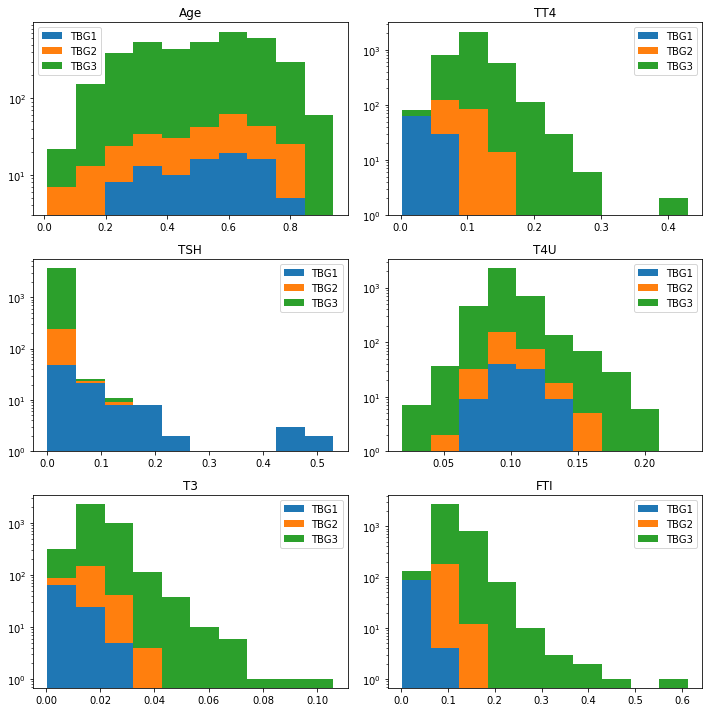

In [28]:
cont_col = [i for i in range(0,len(df.columns)) if i not in cat_col]
df_curr = df.iloc[:,cont_col]
df_curr['TBG'] = df.TBG
TBG1 = df_curr[df_curr.TBG==1]
TBG2 = df_curr[df_curr.TBG==2]
TBG3 = df_curr[df_curr.TBG==3]
# df_curr.hist(column=df_curr.columns[:-1],figsize=(30,20))

nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))

counter_i=0
for i in df_curr.columns[:-1]:
    if counter_i < nrows:
        ax = axes[counter_i][0]
    else:
        counter_j = counter_i-nrows
        ax = axes[counter_j][1]
    
    ax.hist(x=[TBG1[i],TBG2[i],TBG3[i]], stacked=True, log=True)
    ax.legend(['TBG1','TBG2','TBG3'])
    ax.set_title(i)
    counter_i+=1
    
fig.tight_layout()